In [364]:
import cv2 
import numpy as np
import torch
import matplotlib.pyplot as plt
import sklearn
import sklearn.cluster

In [386]:
cap = cv2.VideoCapture("tests/beach.mp4")

In [387]:
cap.get(cv2.CAP_PROP_FRAME_COUNT)

998.0

In [366]:
img = cv2.imread("tests/test_image.jpg")

In [367]:
print(img.shape, type(img))


(512, 512, 3) <class 'numpy.ndarray'>


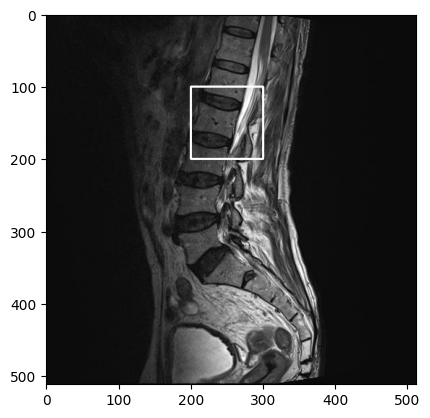

In [368]:
# add rectangle
x = (200,100)
y = (300,200)
color = (255,255,255)
thickness = 2
imgR = cv2.rectangle(img, x, y, color, thickness)
plt.imshow(imgR)


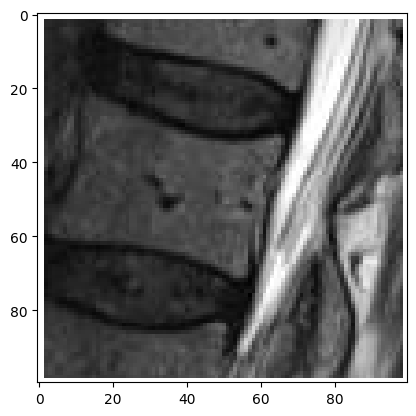

In [369]:
imgRCrop = img[100:200, 200:300]
plt.imshow(imgRCrop)

In [370]:
def visualize_colors(cluster, centroids):
    # Get the number of different clusters, create histogram, and normalize
    labels = np.arange(0, len(np.unique(cluster.labels_)) + 1)
    (hist, _) = np.histogram(cluster.labels_, bins = labels)
    hist = hist.astype("float")
    hist /= hist.sum()

    # Create frequency rect and iterate through each cluster's color and percentage
    rect = np.zeros((50, 300, 3), dtype=np.uint8)
    colors = sorted([(percent, color) for (percent, color) in zip(hist, centroids)])
    start = 0
    for (percent, color) in colors:
        # print(color, "{:0.2f}%".format(percent * 100))
        end = start + (percent * 300)
        cv2.rectangle(rect, (int(start), 0), (int(end), 50), \
                      color.astype("uint8").tolist(), -1)
        start = end
    return rect

In [371]:
imgRCrop.shape

(100, 100, 3)

In [372]:
meanC = np.mean(imgRCrop, axis=(0,1))
meanC

array([89.155, 89.155, 89.155])

In [373]:
meanC.shape

(3,)

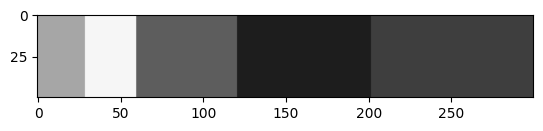

In [374]:
n_clusters = 5

reshape_imgRCrop = imgRCrop.reshape((imgRCrop.shape[0] * imgRCrop.shape[1],3))


avg = sklearn.cluster.KMeans(n_clusters).fit(reshape_imgRCrop)
visualise = visualize_colors(avg, avg.cluster_centers_)
plt.imshow(visualise)

In [375]:
avg.cluster_centers_

array([[ 29.88195991,  29.88195991,  29.88195991],
       [246.3662512 , 246.3662512 , 246.3662512 ],
       [ 93.54193232,  93.54193232,  93.54193232],
       [166.44788442, 166.44788442, 166.44788442],
       [ 62.07926267,  62.07926267,  62.07926267]])

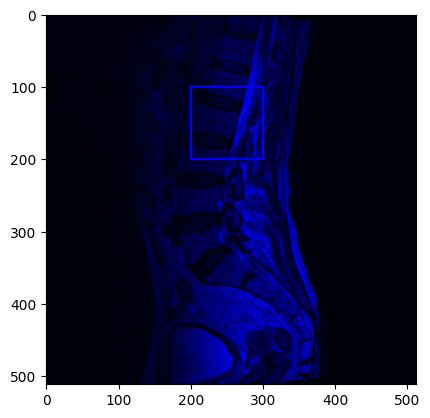

In [376]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img)

In [377]:
L_limit = np.array([98,50,50])
U_limit = np.array([139,255,255])
b_mask = cv2.inRange(hsv_img, L_limit, U_limit)

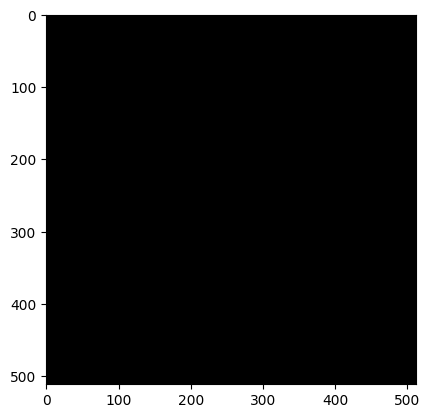

In [378]:
blue = cv2.bitwise_and(img, img, mask=b_mask)
plt.imshow(blue)

In [379]:
# while True:
#     ret, frame = cap.read()
    
#     if not ret:
#         break
    
#     into_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#     b_mask = cv2.inRange(into_hsv, L_limit, U_limit)
#     blue = cv2.bitwise_and(frame, frame, mask=b_mask)
#     cv2.imshow("Og", frame)
#     cv2.imshow("Blue", blue)
#     if cv2.waitKey(25)=="q":
#         break
# cap.release()
# cv2.destroyAllWindows()

In [380]:
# n_clusters = 3
# x,y,h,w = 600,600,100,100
# color = (255,255,255)
# thickness = 2
# idx = 0

# while True:
#     ret, frame = cap.read()
    
#     if not ret:
#         break
    
#     imgR = cv2.rectangle(frame, (x,y), (x+w,y+h), color, thickness) # add recetancle
    
    
#     # imgRCrop = frame[100:200, 200:300] # crop the rectangle
#     imgRCrop = frame[y:y+h, x:x+w] # crop the rectangle
    
  
    
#     reshape = imgRCrop.reshape((imgRCrop.shape[0]*imgRCrop.shape[1],3)) # reshape the crop
    
#     cluster = sklearn.cluster.KMeans(n_clusters).fit(reshape) # fit
    
#     visualise = visualize_colors(cluster, cluster.cluster_centers_) # get centers
#     cv2.imshow('frame',imgR) # show frame with rectangle
#     cv2.imshow("spectrum", visualise)
    
#     if cv2.waitKey(1)==ord('q'):
#         break
#     idx+=1
# cap.release()
# cv2.destroyAllWindows()

In [389]:
n_clusters = 3
x,y,h,w = 0,0,50,50  # color display position
rx, ry, rh, rw = 600, 600, 10,10  # roi rectangle
color = (255,255,255)
thickness = 10
idx = 0
avg_colors = []

# mouseX, mouseY = 0,0

def setROI(event, x,y, flags, param):
    global rx,ry
    if event == cv2.EVENT_FLAG_LBUTTON:
        rx,ry = x,y
        
cv2.namedWindow("frame")
cv2.setMouseCallback("frame", setROI)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    
    imgRCrop = frame[ry:ry+rh, rx:rx+rw] # crop the rectangle
    
    meanColor = np.mean(imgRCrop, axis=(0,1))
    avg_colors.append(meanColor.tolist())
    
    imgR = cv2.rectangle(frame, (x,y), (x+w,y+h), meanColor, -1) # add recetancle for display
    
    imgR = cv2.rectangle(frame, (rx,ry),(rx+rw,ry+rh),color, 2) # roi rect
    
    cv2.imshow('frame',imgR) # show frame with rectangle
    
    if cv2.waitKey(25)==ord('q'):
        break
    
    idx+=1
    
    
cap.release()
cv2.destroyAllWindows()

In [390]:
len(avg_colors)

998

In [ ]:
avg_colors[0:2]

[[138.52, 136.44, 137.4], [138.52, 136.44, 137.4]]

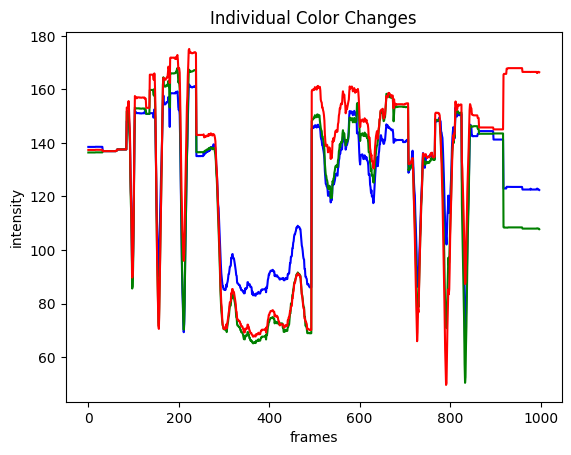

In [398]:
line_colors = np.array(avg_colors)

x = np.arange(len(line_colors)) # for x axis length

fig, ax = plt.subplots()

ax.plot(x,line_colors[:,0], color="blue", label='blue')
ax.plot(x,line_colors[:,1], color="green", label='green')
ax.plot(x,line_colors[:,2], color="red", label='red')

plt.xlabel("frames")
plt.ylabel("intensity")
plt.title("Individual Color Changes")


plt.show()



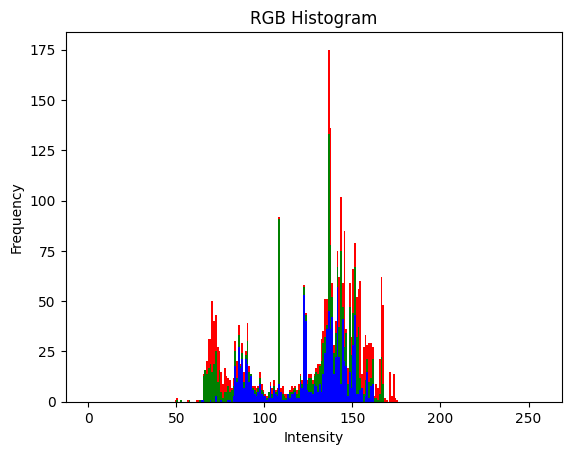

In [ ]:
# frequency histogram
avgC_np = np.array(avg_colors)
avgC_np.reshape(-1,3)
fig,ax = plt.subplots()
ax.hist(avgC_np, bins=256, range=(0,256), color=['blue', 'green', 'red'], stacked=True)

ax.set_xlabel("Intensity")
ax.set_ylabel("Frequency")
ax.set_title("RGB Histogram")

plt.show()

In [382]:
cap.get(cv2.CAP_PROP_FRAME_WIDTH)

0.0

In [383]:
cv2.cuda.printCudaDeviceInfo(0)

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\core\include\opencv2/core/private.cuda.hpp:106: error: (-216:No CUDA support) The library is compiled without CUDA support in function 'throw_no_cuda'
